In [1]:
import os
from ngs import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from scipy.stats import spearmanr, linregress

repo_root = os.path.dirname(os.getcwd())

NGS package imported


In [2]:
#path to NGS data
p1_nnk = os.path.join(repo_root, "data", "ngs_data", "Rep_1")
p2_nnk = os.path.join(repo_root, "data", "ngs_data", "Rep_2")

#Allowed mutations with NNK is everything
mut_dict_nnk = {
0: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'V', 'W', 'Y'], #S
1: ['C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #A
2: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'V', 'W', 'Y'], #S
3: ['A', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #F
4: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W'], #Y
5: ['A', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #F
6: ['A', 'C', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #D
7: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'V', 'W', 'Y'], #T
8: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W'], #Y
9: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], #I 
}

#AF1 97 WT Mutation string
wt = 'SASFYFDTYI'

#DMD data objects
d1_nnk = NGS_DMD(
    sequence_type = 'mutations', samples = ['R2', 'R3', 'R5', 'R6', 'R7'],
    path = p1_nnk, wild_type = wt, mutations_dict = mut_dict_nnk
)

d2_nnk = NGS_DMD(
    sequence_type = 'mutations', samples = ['R2', 'R3', 'R5', 'R6', 'R7'],
    path = p2_nnk, wild_type = wt, mutations_dict = mut_dict_nnk
)

['Mutation_1001.csv', 'Mutation_1003.csv', 'Mutation_1005.csv', 'Mutation_1007.csv', 'Mutation_1009.csv']
['Mutation_1001.csv', 'Mutation_1003.csv', 'Mutation_1005.csv', 'Mutation_1007.csv', 'Mutation_1009.csv']


In [3]:
full_clones = set()
for r in d1_nnk.samples:
    full_clones = full_clones.union(common_clones({d1_nnk: [r], d2_nnk: [r]}))
full_clones = [c for c in full_clones if "*" not in c]

clones = common_clones({d1_nnk: ['R2', 'R3', 'R5', 'R6'], d2_nnk: ['R2', 'R3', 'R5', 'R6']})
potential_clones = [c for c in clones if "*" not in c]

In [6]:
d_nnk_r1 = ngs_analysis(
    replicates = [d1_nnk],
    common_rounds = ['R2', 'R3', 'R5', 'R6', 'R7'],
    clone_set = full_clones
)

d_nnk_r2 = ngs_analysis(
    replicates = [d2_nnk],
    common_rounds = ['R2', 'R3', 'R5', 'R6', 'R7'],
    clone_set = full_clones
)

In [7]:
# generate data matrix containing clones and averaged frequencies
d_nnk_r1.generate_D()

# generate PSSMs for each round
for sample in d_nnk_r1.samples:
    d_nnk_r1.generate_PSSM(sample, pseudocount="proportional")

# generate PSERMs for rounds of interest and score all clones
d_nnk_r1.generate_PSERM(In_sample = "R5", Out_sample = "R6")
d_nnk_r1.generate_PSERM(In_sample = "R6", Out_sample = "R7")
d_nnk_r1.score_all_clones_mp()

# generate data matrix containing clones and averaged frequencies
d_nnk_r2.generate_D()

# generate PSSMs for each round
for sample in d_nnk_r2.samples:
    d_nnk_r2.generate_PSSM(sample, pseudocount="proportional")

# generate PSERMs for rounds of interest and score all clones
d_nnk_r2.generate_PSERM(In_sample = "R5", Out_sample = "R6")
d_nnk_r2.generate_PSERM(In_sample = "R6", Out_sample = "R7")
d_nnk_r2.score_all_clones_mp()

Generating MSA.


100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 83.77it/s]


Done in 0.01 minutes
Generating MSA.


100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 85.03it/s]


Done in 0.01 minutes


In [8]:
d_nnk = ngs_analysis(
    replicates = [d1_nnk, d2_nnk],
    common_rounds = ['R2', 'R3', 'R5', 'R6', 'R7'],
    clone_set = full_clones
)

# generate data matrix containing clones and averaged frequencies
d_nnk.generate_D()

# generate PSSMs for each round
for sample in d_nnk.samples:
    d_nnk.generate_PSSM(sample, pseudocount="proportional")

# generate PSERMs for rounds of interest and score all clones
d_nnk.generate_PSERM(In_sample = "R5", Out_sample = "R6")
d_nnk.generate_PSERM(In_sample = "R6", Out_sample = "R7")
d_nnk.score_all_clones_mp()

Generating MSA.


100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 83.03it/s]


Done in 0.01 minutes


In [9]:
full_clones_no_wt = [c for c in full_clones if c != d_nnk.wt]

d_nnk_no_wt = ngs_analysis(
    replicates = [d1_nnk, d2_nnk],
    common_rounds = ['R2', 'R3', 'R5', 'R6', 'R7'],
    clone_set = full_clones_no_wt
)

# generate data matrix containing clones and averaged frequencies
d_nnk_no_wt.generate_D()

# generate PSSMs for each round
for sample in d_nnk_no_wt.samples:
    d_nnk_no_wt.generate_PSSM(sample, pseudocount="proportional")

# generate PSERMs for rounds of interest and score all clones
d_nnk_no_wt.generate_PSERM(In_sample = "R5", Out_sample = "R6")
d_nnk_no_wt.generate_PSERM(In_sample = "R6", Out_sample = "R7")
d_nnk_no_wt.score_all_clones_mp()

Generating MSA.


100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 83.82it/s]


Done in 0.01 minutes


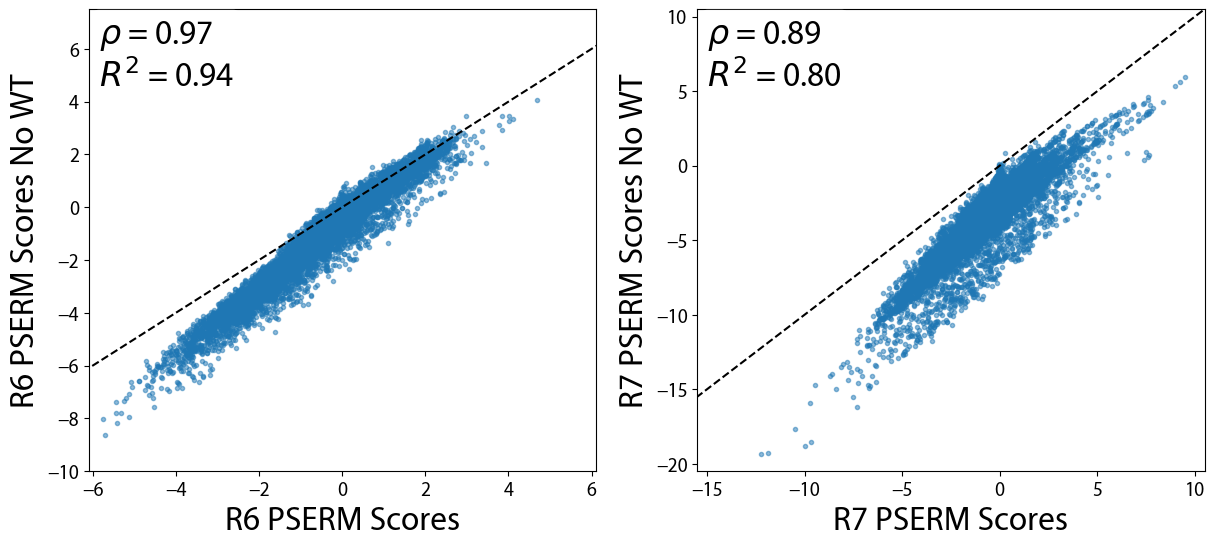

In [10]:
# Font properties
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
if os.path.exists(fpath):
    prop = fm.FontProperties(fname=fpath, size=24)   # for axis labels
    propg = fm.FontProperties(fname=fpath, size=14)  # for tick labels
else:
    prop = fm.FontProperties(size=24)
    propg = fm.FontProperties(size=14)

fig, axs = plt.subplots(1, 2, figsize = (14.4, 6))


axs[0].plot(
    d_nnk.scores.loc[full_clones_no_wt, "R6 PSERM Score"], 
    d_nnk_no_wt.scores.loc[full_clones_no_wt, "R6 PSERM Score"], 
    '.',
    alpha = 0.5
)

axs[1].plot(
    d_nnk.scores.loc[full_clones_no_wt, "R7 PSERM Score"], 
    d_nnk_no_wt.scores.loc[full_clones_no_wt, "R7 PSERM Score"], 
    '.',
    alpha = 0.5
)

axs[0].set_xlabel("R6 PSERM Scores", fontproperties = prop)
axs[0].set_ylabel("R6 PSERM Scores No WT", fontproperties = prop)
axs[1].set_xlabel("R7 PSERM Scores", fontproperties = prop)
axs[1].set_ylabel("R7 PSERM Scores No WT", fontproperties = prop)

axs[0].set_xlim(-6.1, 6.1)
axs[0].set_ylim(-10, 7.5)
axs[1].set_xlim(-15.5, 10.5)
axs[1].set_ylim(-20.5, 10.5)

rho_r6, _ = spearmanr(
    d_nnk.scores.loc[full_clones_no_wt, "R6 PSERM Score"], 
    d_nnk_no_wt.scores.loc[full_clones_no_wt, "R6 PSERM Score"]
)
_, _, r_r6, _, _ = linregress(
    d_nnk.scores.loc[full_clones_no_wt, "R6 PSERM Score"], 
    d_nnk_no_wt.scores.loc[full_clones_no_wt, "R6 PSERM Score"]
)

rho_r7, _ = spearmanr(
    d_nnk.scores.loc[full_clones_no_wt, "R7 PSERM Score"], 
    d_nnk_no_wt.scores.loc[full_clones_no_wt, "R7 PSERM Score"]
)
_, _, r_r7, _, _ = linregress(
    d_nnk.scores.loc[full_clones_no_wt, "R7 PSERM Score"], 
    d_nnk_no_wt.scores.loc[full_clones_no_wt, "R7 PSERM Score"]
)

rhos = [rho_r6, rho_r7]
rs = [r_r6, r_r7]

for i, ax in enumerate(axs):
    ax.plot(
        [-16, 16],
        [-16, 16],
        '--',
        color = "k"
    )
    
    ax.text(
        0.02, 0.98,
        f"$\\rho$ = {rhos[i]:.2f}\n$R^2$ = {rs[i]**2:.2f}",
        transform=ax.transAxes,
        ha="left", va="top",
        fontproperties = prop,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
    )
    
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(propg)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(propg)

plt.savefig(os.path.join(repo_root, "results", "Figure-S5A.pdf"), transparent = True, dpi = 600)
plt.show()

In [11]:
potential_clones_no_wt = [c for c in potential_clones if c != d_nnk_no_wt.wt]
# Create score cutoffs - top 4 for both R6 and R7
n = 40
subset = d_nnk_no_wt.scores.loc[potential_clones_no_wt]

result = subset.apply(lambda col: col.nlargest(n).iloc[-1])
result

R6 PSERM Score    0.867957
R7 PSERM Score   -0.262972
dtype: float64

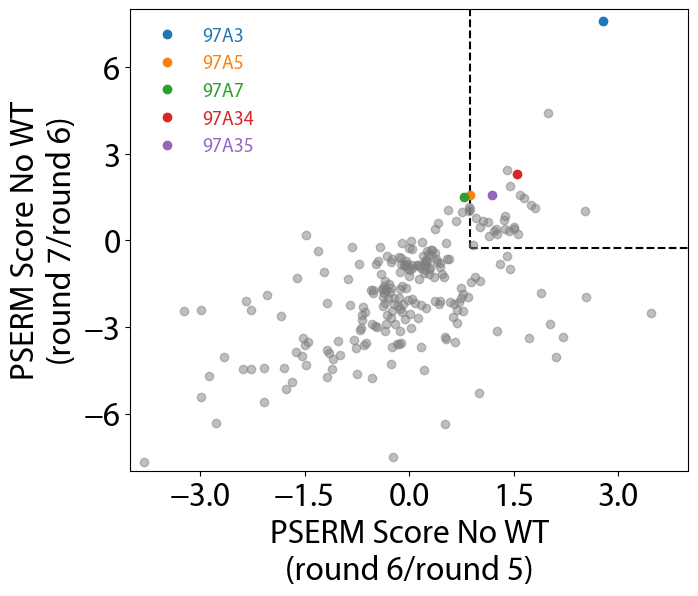

In [12]:
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
if os.path.exists(fpath):
    prop = fm.FontProperties(fname = fpath, size = 24)
    propg = fm.FontProperties(fname = fpath, size = 14)
else:
    prop = fm.FontProperties(size = 24)
    propg = fm.FontProperties(size = 14)
    
fig, axs = plt.subplots(1, 1, figsize = (7.2, 6))

axs.plot([result["R6 PSERM Score"], result["R6 PSERM Score"]], [result["R7 PSERM Score"], 8.1], '--', color = 'k')
axs.plot([result["R6 PSERM Score"], 4], [result["R7 PSERM Score"], result["R7 PSERM Score"]], '--', color = 'k')
axs.set_xlabel('PSERM Score No WT\n(round 6/round 5)', fontproperties = prop)
axs.set_ylabel('PSERM Score No WT\n(round 7/round 6)', fontproperties = prop)

axs.xaxis.set_ticks([-3.0, -1.5, 0.0, 1.5, 3.0])
axs.set_xlim([-4, 4])
axs.yaxis.set_ticks([-6, -3, 0, 3, 6])
axs.set_ylim([-8, 8])

for tick in axs.get_xticklabels():
    tick.set_fontproperties(prop)
for tick in axs.get_yticklabels():
    tick.set_fontproperties(prop)

axs.plot(
    d_nnk_no_wt.scores.loc[potential_clones_no_wt, 'R6 PSERM Score'], 
    d_nnk_no_wt.scores.loc[potential_clones_no_wt, 'R7 PSERM Score'], 
    "o", 
    alpha = 0.5, 
    color = "grey",
)

clone_names = pd.read_csv(os.path.join(repo_root, "data", "clone_names.csv"), index_col = 0)
clones_of_interest = ["97A3", "97A5", "97A7", "97A34", "97A35"]

for seq in clone_names.index:
    name = clone_names.loc[seq, "Clone"]
    if name in clones_of_interest:
        if name != "97":
            color = plt.get_cmap("tab10")(clones_of_interest.index(name))
            label = name
        else:
            color = "k"
            label = f"{name} (WT)"
            
        axs.plot(
            d_nnk.scores.loc[seq, "R6 PSERM Score"],
            d_nnk.scores.loc[seq, "R7 PSERM Score"],
            "o",
            color = color,
            label = label
        )
        
plt.legend(frameon = False, labelcolor = "linecolor", prop = propg)
plt.savefig(os.path.join(repo_root, "results", 'Figure-S5B.pdf'), dpi = 600, bbox_inches = 'tight')
plt.show()

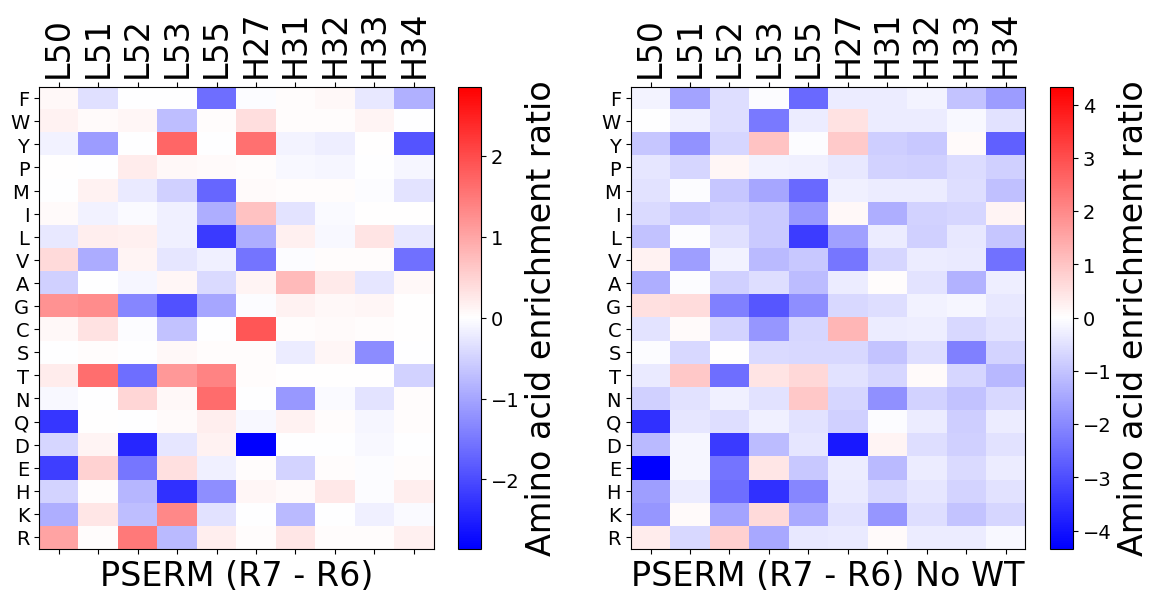

In [30]:
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
if os.path.exists(fpath):
    prop = fm.FontProperties(fname = fpath, size = 24)
    propg = fm.FontProperties(fname = fpath, size = 14)
else:
    prop = fm.FontProperties(size = 24)
    propg = fm.FontProperties(size = 14)

fpathl = "/Library/Fonts/cour.ttf"
if os.path.exists(fpathl):
    aaprop = fm.FontProperties(fname = fpathl, size = 14)
else:
    aaprop = fm.FontProperties(size = 14)

r7_pserm_max = max([
    abs((d_nnk.PSERM["R7"]).min().min()),
    (d_nnk.PSERM["R7"]).max().max()
])
r7nowt_pserm_max = max([
     abs((d_nnk_no_wt.PSERM['R7']).min().min()),
     (d_nnk_no_wt.PSERM['R7']).max().max()
])

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

cax1 = axs[0].matshow(d_nnk.PSERM['R7'], aspect = 'auto', cmap = 'bwr', vmin = -r7_pserm_max, vmax = r7_pserm_max)
cax2 = axs[1].matshow(d_nnk_no_wt.PSERM['R7'], aspect = 'auto', cmap = 'bwr', vmin = -r7nowt_pserm_max, vmax = r7nowt_pserm_max)

for ax in axs:
    ax.set_xticks(list(range(10)))
    ax.set_xticklabels(['L50', 'L51', 'L52', 'L53', 'L55', 'H27', 'H31', 'H32', 'H33', 'H34'], rotation = 90, fontproperties = prop)
    ax.set_yticks(list(range(20)))
    ax.set_yticklabels((d_nnk.PSERM['R6']).index, fontproperties = aaprop)
              
axs[0].set_xlabel('PSERM (R7 - R6)', fontproperties = prop)
axs[1].set_xlabel('PSERM (R7 - R6) No WT', fontproperties = prop)

cbar1 = fig.colorbar(cax1, ax=axs[0], orientation='vertical')
cbar1.set_label("Amino acid enrichment ratio", fontproperties = prop)
for label in cbar1.ax.get_yticklabels():
    label.set_fontproperties(propg)

cbar2 = fig.colorbar(cax2, ax=axs[1], orientation='vertical')
cbar2.set_label("Amino acid enrichment ratio", fontproperties = prop)
for label in cbar2.ax.get_yticklabels():
    label.set_fontproperties(propg)